In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
path = '/Users/fbickfordsmith/Google Drive/Project/attention/'
path_baseline = path+'results/baseline_classwise_acc.csv'
path_trained = path+'results/sizecontexts_trained_metrics.csv'
path_contexts = path+'contexts/sizecontexts_wnids.csv'
path_synsets = path+'metadata/synsets.txt'

In [3]:
wnids = [line.rstrip('\n') for line in open(path_synsets)]
wnid2ind = {wnid:ind for ind, wnid in enumerate(wnids)}

In [4]:
with open(path_contexts) as f:
    contexts = [row for row in csv.reader(f, delimiter=',')]

In [5]:
context_sizes = np.array([int(1.4**i) for i in range(2, 20)])

In [19]:
df0 = pd.read_csv(path_baseline, index_col=0)

In [62]:
acc0 = []
for c in contexts:
    inds_in = [wnid2ind[w] for w in c]
    inds_out = list(set(range(1000)) - set(inds_in))
    acc0.append([np.mean(df0['accuracy'][inds_in]), np.mean(df0['accuracy'][inds_out])])
acc0 = np.array(acc0)
acc0_all = df0['num_correct'].sum() / df0['num_examples'].sum()

In [48]:
df1 = pd.read_csv(path+'results/sizecontexts_trained_metrics.csv', index_col=0)
df1['all_acc'] = ((context_sizes*df1['incontext_acc']) + ((1000-context_sizes)*df1['outofcontext_acc'])) / 1000
df1

,incontext_loss,incontext_acc,incontext_top5_acc,outofcontext_loss,outofcontext_acc,outofcontext_top5_acc,all_acc
0,0.053912,0.973684,1.000000,2.315398,0.517783,0.791735,0.518239
1,0.837919,0.775510,0.928571,1.485296,0.650080,0.863138,0.650331
2,1.608164,0.684564,0.859060,1.447491,0.656045,0.865007,0.656131
3,1.097224,0.741525,0.902542,1.462691,0.654881,0.865024,0.655314
4,1.358967,0.676012,0.862928,1.468449,0.655065,0.864295,0.655211
5,1.193719,0.708333,0.891667,1.479246,0.655016,0.862721,0.655549
6,1.404261,0.667158,0.874816,1.468776,0.653162,0.863029,0.653358
7,1.288620,0.695697,0.891393,1.477870,0.652186,0.862334,0.653056
8,1.205577,0.688379,0.904515,1.473370,0.654759,0.861742,0.655701
9,1.356528,0.676210,0.876627,1.459271,0.653643,0.863777,0.654546


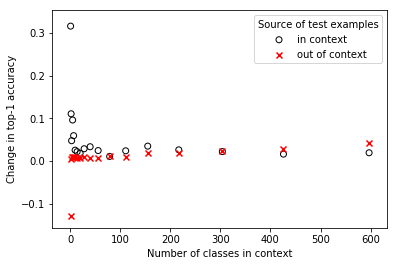

In [89]:
plt.scatter(context_sizes, df1['incontext_acc']-acc0[:, 0], label='in context', marker='o', facecolors='none', edgecolors='k')
plt.scatter(context_sizes, df1['outofcontext_acc']-acc0[:, 1], label='out of context', c='r', marker='x')
plt.xlabel('Number of classes in context')
plt.ylabel('Change in top-1 accuracy')
plt.legend(title='Source of test examples')
# plt.xlim((-10, 100))
plt.savefig('sizecontexts_acc_change_br.png', dpi=600)
plt.show()

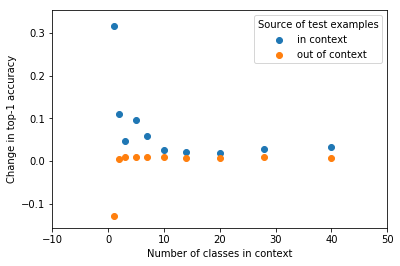

In [66]:
plt.scatter(context_sizes, df1['incontext_acc']-acc0[:, 0], label='in context')
plt.scatter(context_sizes, df1['outofcontext_acc']-acc0[:, 1], label='out of context')
plt.xlabel('Number of classes in context')
plt.ylabel('Change in top-1 accuracy')
plt.legend(title='Source of test examples')
plt.xlim((-10, 50))
plt.show()

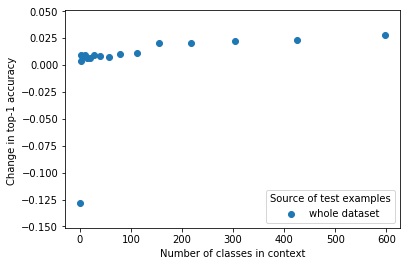

In [67]:
plt.scatter(context_sizes, df1['all_acc']-acc0_all, label='whole dataset')
plt.xlabel('Number of classes in context')
plt.ylabel('Change in top-1 accuracy')
plt.legend(title='Source of test examples')
plt.show()

In [71]:
path_training = '/Users/fbickfordsmith/Google Drive/Project/attention/training/'
num_epochs = [len(pd.read_csv(path_training+f'sizecontext{i:02}_training.csv', index_col=0)) for i in range(18)]
num_epochs

[1000, 7, 4, 15, 4, 3, 3, 2, 3, 4, 3, 2, 3, 5, 3, 3, 2, 3]

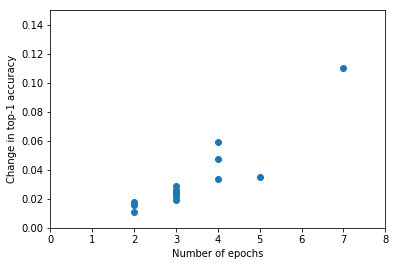

In [86]:
plt.scatter(num_epochs, (df1['incontext_acc']-acc0[:, 0]))
plt.xlabel('Number of epochs')
plt.ylabel('Change in top-1 accuracy')
plt.xlim((0, 8))
plt.ylim((0, 0.15))
plt.show()